In [1]:
import warnings

warnings.filterwarnings("ignore")

import pyspark.sql
from pyspark.sql.functions import *

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
# tweak the matplotlib style defaults
plt.rc("figure", figsize=(13, 7))
plt.rc("font", size=14)
plt.style.use("ggplot")
import seaborn as sns

from wrangle import wrangle_311

spark = pyspark.sql.SparkSession.builder.getOrCreate()

df = wrangle_311(spark)
print("\ndf shape: (%d, %d)\n" % (df.count(), len(df.columns)))
df.show(1, vertical=True)

[wrangle.py] reading case.csv
[wrangle.py] handling data types
[wrangle.py] parsing dates
[wrangle.py] adding features
[wrangle.py] joining departments

df shape: (841704, 20)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 005                  
 num_weeks_late       | -142.6441088         
 zipcode              | 78207                
 case_age             | 219                  
 days_to_closed       | 0                

### 1. How many different cases are there, by department?

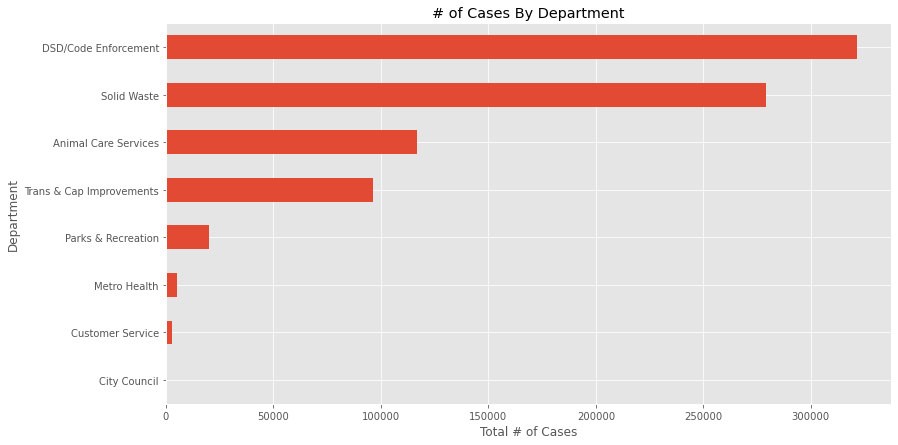

In [2]:
(df.groupBy('department').count().toPandas()
     .set_index('department')['count'].sort_values()
     .plot.barh())
plt.xlabel('Total # of Cases')
plt.ylabel('Department')
plt.title('# of Cases By Department')
plt.show()

### 2. Does the percentage of cases that are late vary by department?

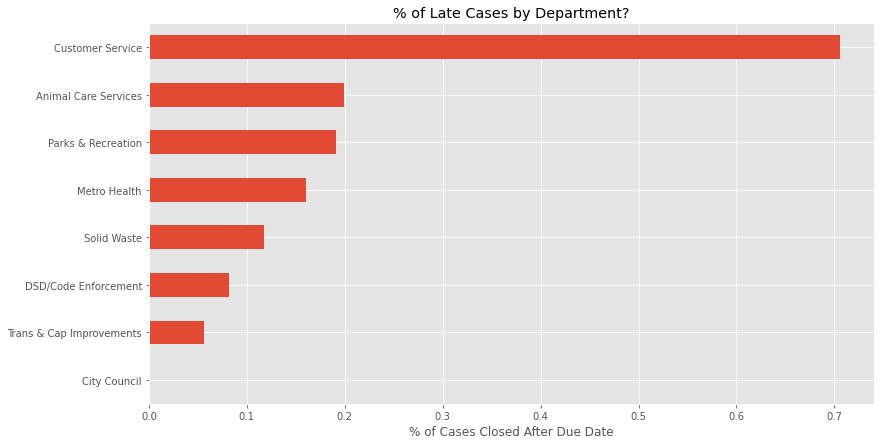

In [3]:
(
    df.withColumn("case_late", col("case_late").cast("int"))
    .groupby("department")
    .agg(avg("case_late").alias("p_cases_late"))
    .toPandas()
    .set_index("department")
    .p_cases_late.sort_values()
    .plot.barh()
)
plt.ylabel("")
plt.xlabel("% of Cases Closed After Due Date")
plt.title("% of Late Cases by Department?")
plt.show()

### 3. On average, how late are the late cases by department?

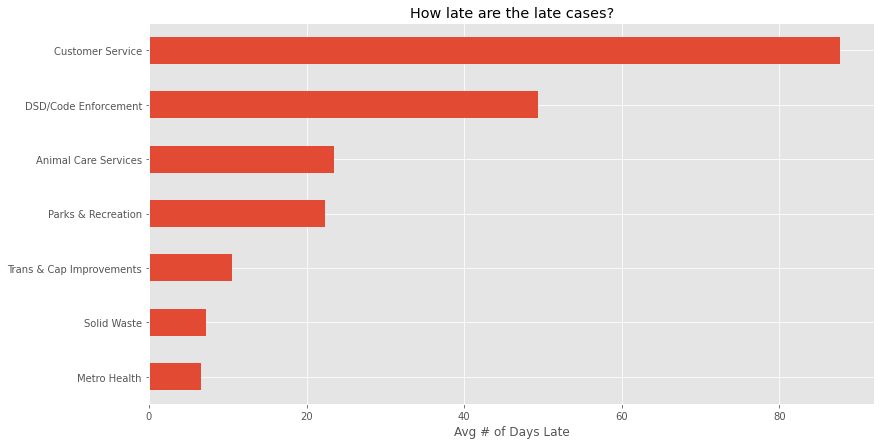

In [4]:
(df.where('case_late').groupBy('department').agg(avg('num_days_late').alias('avg_days_late'))
    .toPandas().set_index('department').avg_days_late.sort_values()
    .plot.barh())
plt.ylabel("")
plt.xlabel("Avg # of Days Late")
plt.title("How late are the late cases?")
plt.show()

### 4. What is the service type that is the most late? Just for Parks & Rec?

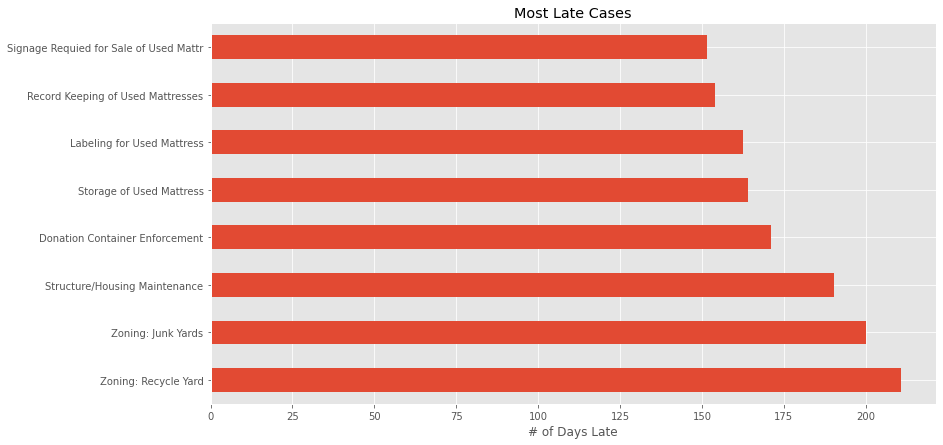

In [5]:
(
    df.where(df.case_late)
    #.filter(df.department == "Parks & Recreation") # comment out this line to see all
    .groupby("service_request_type")
    .agg(mean("num_days_late").alias("avg_days_late"))
    .sort(desc("avg_days_late"))
    .limit(8)  # limit in spark, not pandas
    .toPandas()
    .set_index("service_request_type")
    .avg_days_late
    .plot.barh()
)

plt.title("Most Late Cases")
plt.xlabel("# of Days Late")
plt.ylabel("")
plt.show()

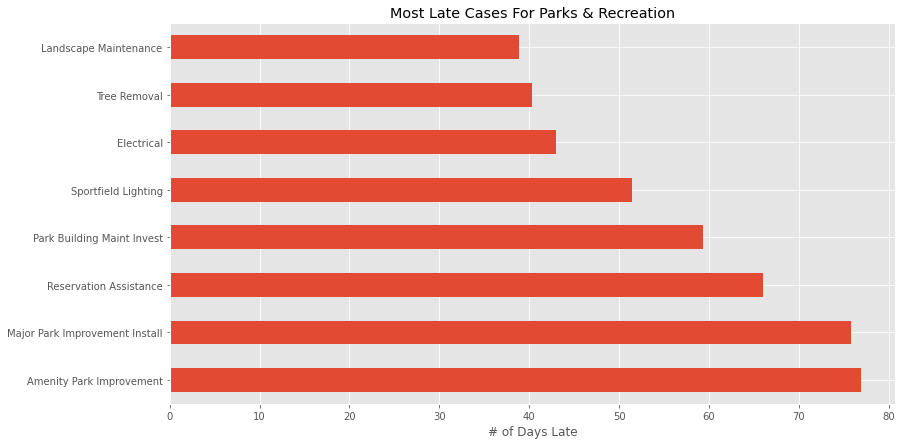

In [6]:
(
    df.where(df.case_late)
    .filter(df.department == "Parks & Recreation") # comment out this line to see all
    .groupby("service_request_type")
    .agg(mean("num_days_late").alias("avg_days_late"))
    .sort(desc("avg_days_late"))
    .limit(8)  # limit in spark, not pandas
    .toPandas()
    .set_index("service_request_type")
    .avg_days_late
    .plot.barh()
)

plt.title("Most Late Cases For Parks & Recreation")
plt.xlabel("# of Days Late")
plt.ylabel("")
plt.show()

### 5. For the DSD/Code Enforcement department, what are the most common service request types? Look at other departments too.

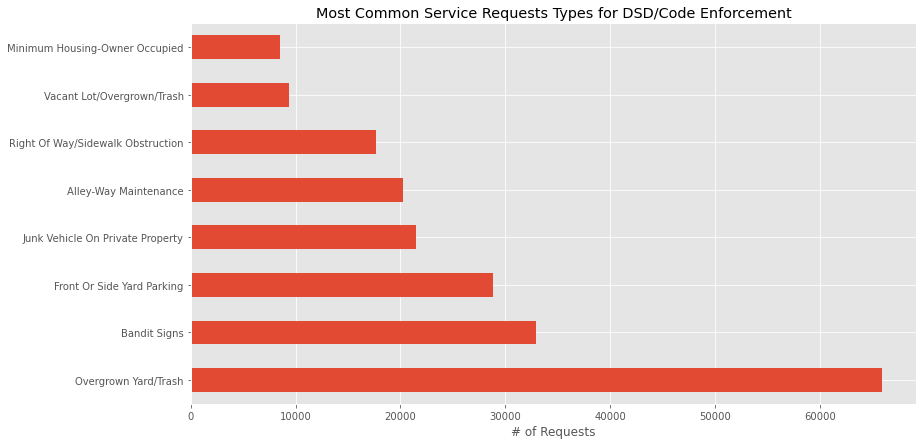

In [7]:
(
    df.filter(expr('department == "DSD/Code Enforcement"'))    
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh()
)

plt.xlabel("# of Requests")
plt.ylabel("")
plt.title("Most Common Service Requests Types for DSD/Code Enforcement")
plt.show()

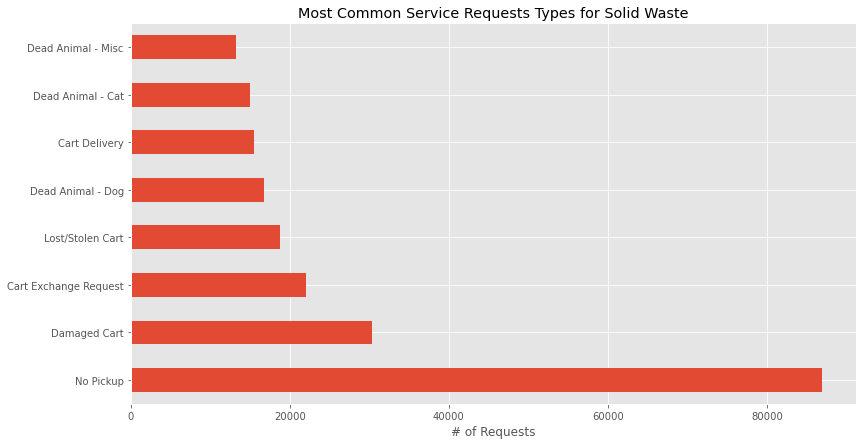

In [8]:
(
    df.filter(expr('department == "Solid Waste"'))    
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh()
)

plt.xlabel("# of Requests")
plt.ylabel("")
plt.title("Most Common Service Requests Types for Solid Waste")
plt.show()

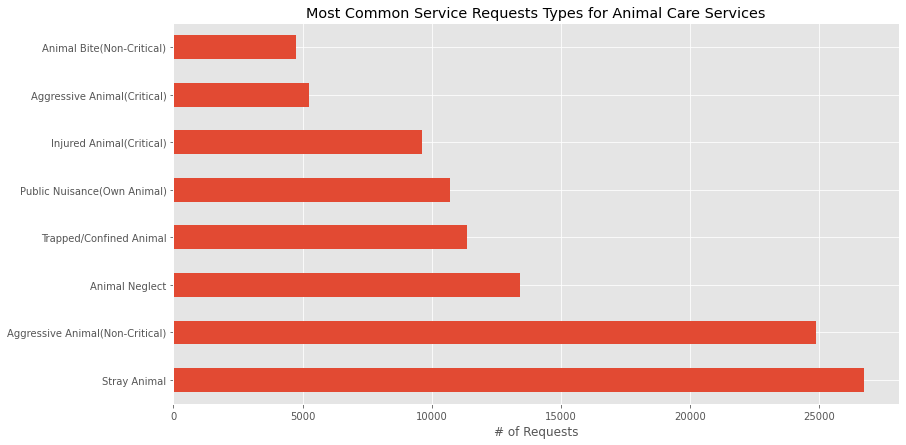

In [9]:
(
    df.filter(expr('department == "Animal Care Services"'))    
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh()
)

plt.xlabel("# of Requests")
plt.ylabel("")
plt.title("Most Common Service Requests Types for Animal Care Services")
plt.show()

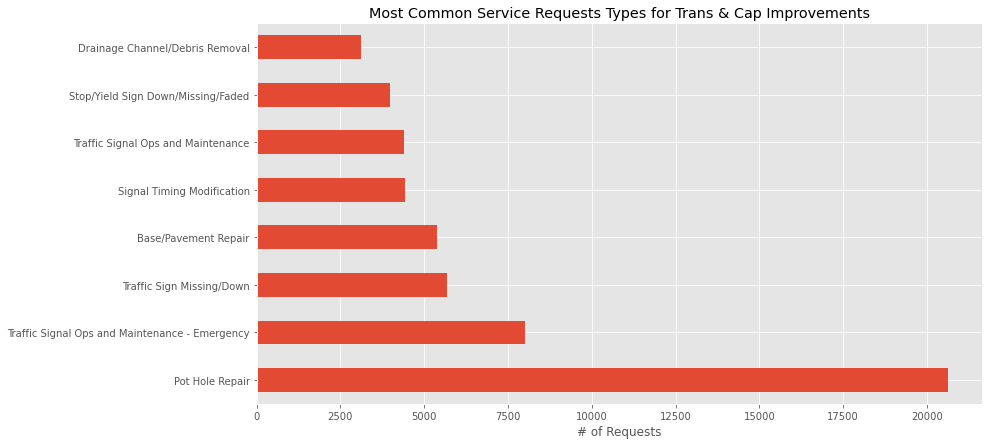

In [10]:
(
    df.filter(expr('department == "Trans & Cap Improvements"'))    
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh()
)

plt.xlabel("# of Requests")
plt.ylabel("")
plt.title("Most Common Service Requests Types for Trans & Cap Improvements")
plt.show()

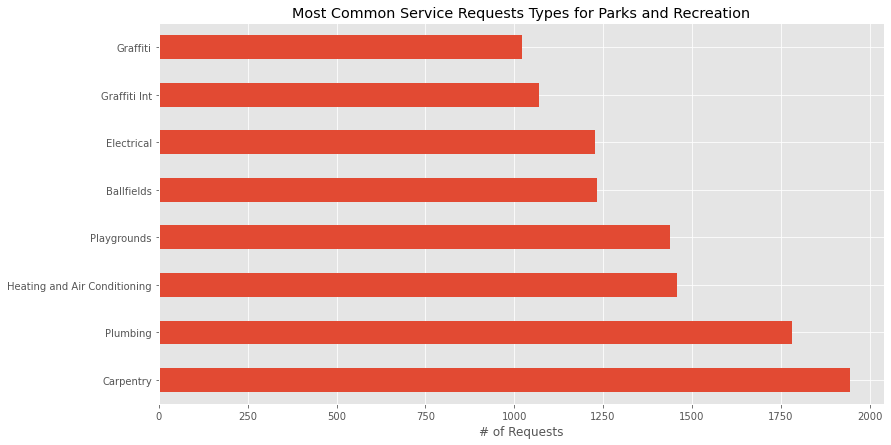

In [11]:
(
    df.filter(expr('department == "Parks & Recreation"'))    
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh()
)

plt.xlabel("# of Requests")
plt.ylabel("")
plt.title("Most Common Service Requests Types for Parks and Recreation")
plt.show()

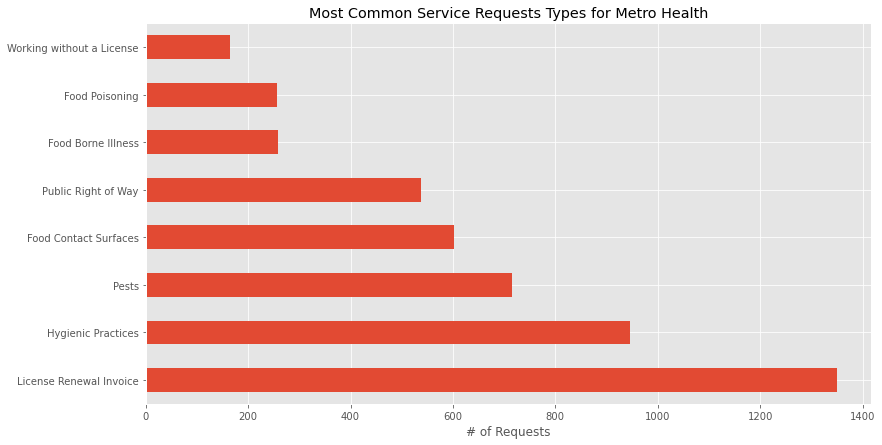

In [12]:
(
    df.filter(expr('department == "Metro Health"'))    
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh()
)

plt.xlabel("# of Requests")
plt.ylabel("")
plt.title("Most Common Service Requests Types for Metro Health")
plt.show()

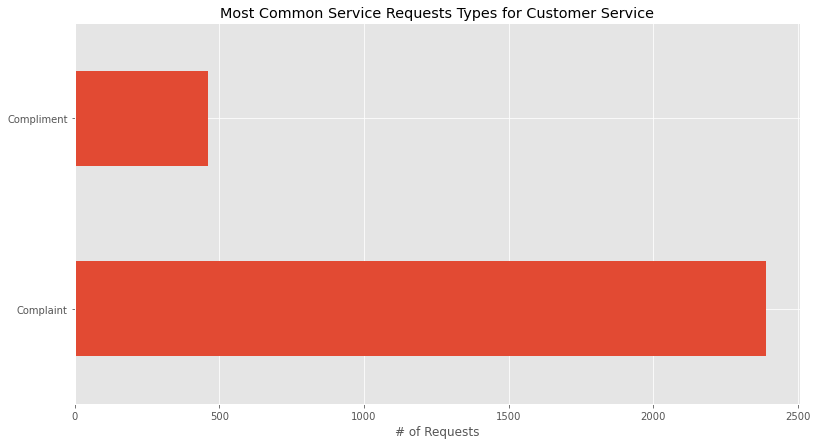

In [13]:
(
    df.filter(expr('department == "Customer Service"'))    
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh()
)

plt.xlabel("# of Requests")
plt.ylabel("")
plt.title("Most Common Service Requests Types for Customer Service")
plt.show()

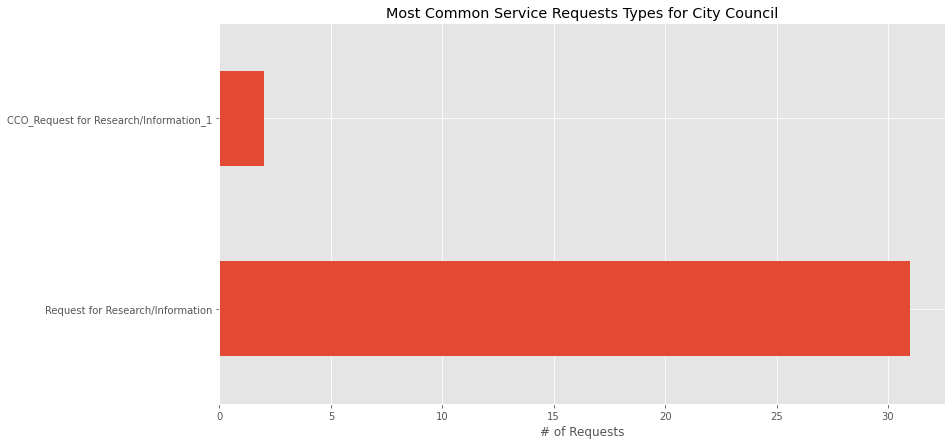

In [14]:
(
    df.filter(expr('department == "City Council"'))    
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh()
)

plt.xlabel("# of Requests")
plt.ylabel("")
plt.title("Most Common Service Requests Types for City Council")
plt.show()

### 6. Does whether or not its a weekend matter for when a case is opened/closed?

In [15]:
def format_number(x, *args):
    return "{:.0f}k".format(x / 1000)

In [16]:
def format_number_sub_thousands(x, *args):
    return "{:.0f}k".format(x / 1000)

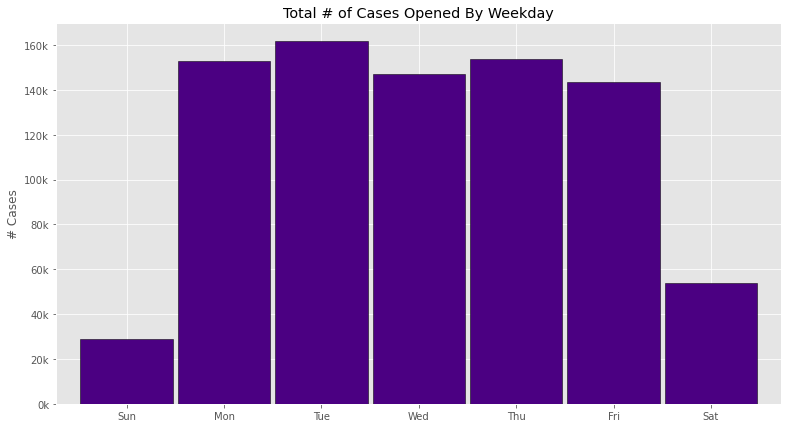

In [17]:
weekdays = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

(
    df.withColumn("weekday", date_format("case_opened_date", "E"))
    # the line above is an example of doing the date formatting with spark
    # through the SimpleDateFormat api instead of with python
    .groupby("weekday")
    .count()
    .na.drop()
    .toPandas()
    # Here we convert the weekday string to a categorical type with an order.
    # This lets us order the weekdays properly in our visualization.
    .assign(weekday=lambda df: pd.Categorical(df.weekday, categories=weekdays, ordered=True))
    .set_index("weekday")["count"]
    .sort_index()
    .plot.bar(width=0.95, ec="black", color="indigo")
)

plt.xticks(rotation=0)
plt.gca().set(
    xlabel="", ylabel="# Cases", title="Total # of Cases Opened By Weekday"
)
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number_sub_thousands))

### 7. On average, how many cases are opened a day for the Customer Service department?

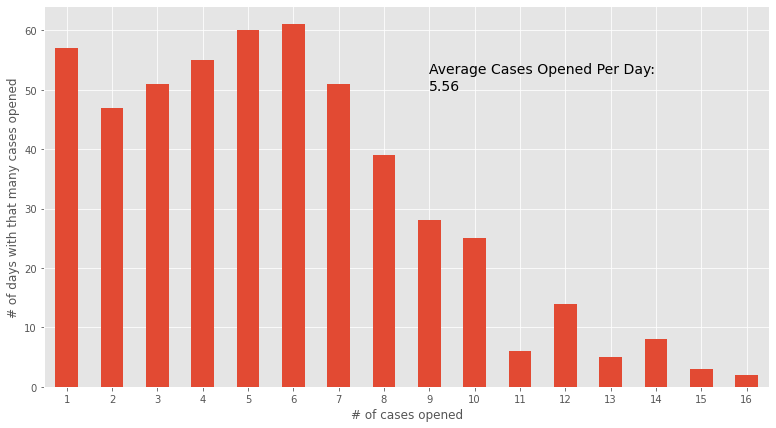

In [18]:
def plot_cases(df):
    s = df["count"]
    avg = s.mean()
    s.value_counts().sort_index().plot.bar()
    plt.text(
        8, 50, f"Average Cases Opened Per Day:\n{avg:.2f}", ha="left", size=14
    )
    plt.xlabel("# of cases opened")
    plt.ylabel("# of days with that many cases opened")
    plt.xticks(rotation=0)


(
    df.withColumn("case_opened_date", expr("date(case_opened_date)"))
    .filter(df.department == "Customer Service")
    .groupby("case_opened_date")
    .count()
    .toPandas()
    # .pipe takes our data frame and "pipes" the dataframe into a function
    .pipe(plot_cases)
)

### 8. Does the number of service requests for the solid waste department vary by day of the week?

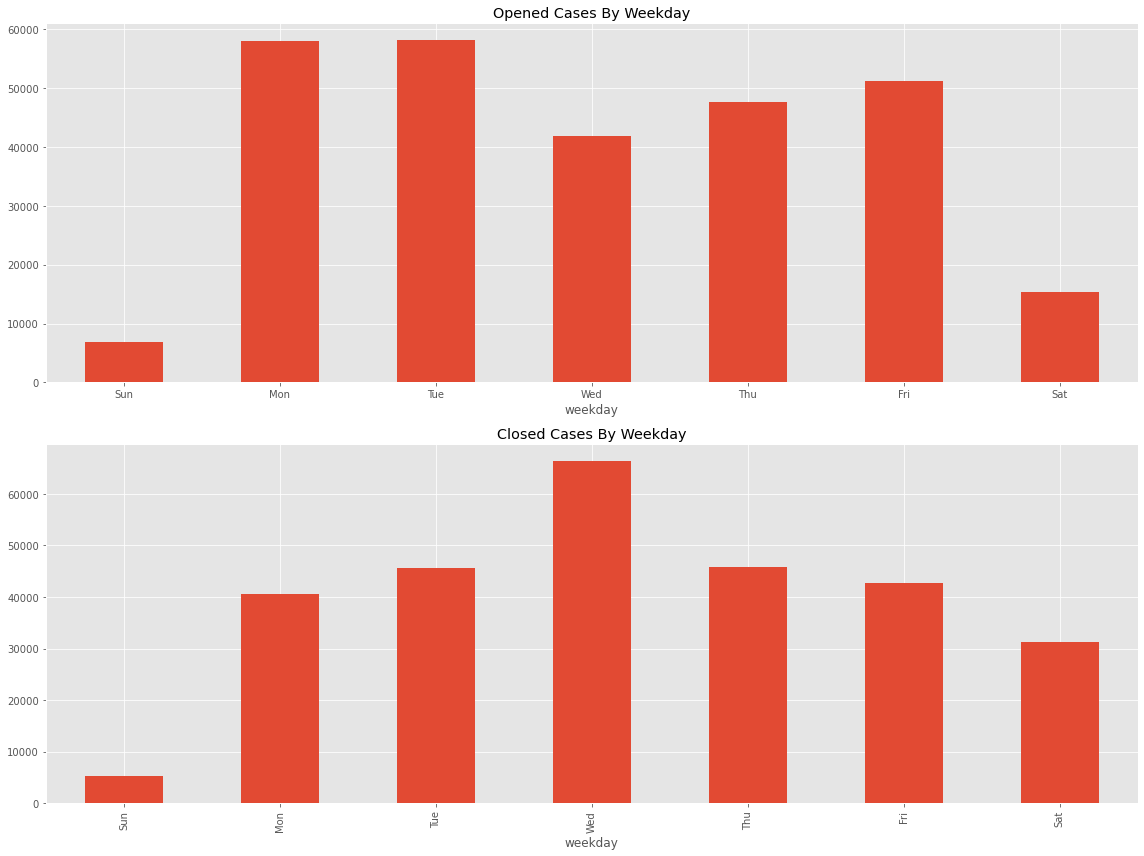

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

(
    df.withColumn("weekday", date_format("case_opened_date", "E"))
    .filter(expr('department == "Solid Waste"'))
    .groupby("weekday")
    .count()
    .na.drop()
    .toPandas()
    .assign(weekday=lambda df: pd.Categorical(df.weekday, categories=weekdays, ordered=True))
    .set_index('weekday')['count']
    .sort_index()
    .plot.bar(ax=ax1)
)
ax1.set(
    title='Opened Cases By Weekday'
)
ax1.tick_params(axis='x', labelrotation=0)


(
    df.withColumn("weekday", date_format("case_closed_date", "E"))
    .filter(expr('department == "Solid Waste"'))
    .groupby("weekday")
    .count()
    .na.drop()
    .toPandas()
    .assign(weekday=lambda df: pd.Categorical(df.weekday, categories=weekdays, ordered=True))
    .set_index('weekday')['count']
    .sort_index()
    .plot.bar(ax=ax2)
)
ax2.set(
    title='Closed Cases By Weekday'
)
fig.tight_layout()